In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout,BatchNormalization, Bidirectional, LSTM, Reshape
from sklearn.metrics import accuracy_score

In [5]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [6]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [7]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)
X_train.shape

(7023, 150, 150, 3)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=101)

In [9]:
Y_train_new = []
for i in Y_train:
    Y_train_new.append(labels.index(i))
Y_train=Y_train_new
Y_train = tf.keras.utils.to_categorical(Y_train)

Y_test_new = []
for i in Y_test:
    Y_test_new.append(labels.index(i))
Y_test=Y_test_new
Y_test = tf.keras.utils.to_categorical(Y_test)

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Reshape((36, 2304)))

lstm_fw = LSTM(units = 32)
lstm_bw = LSTM(units = 32, go_backwards = True)

model.add(Bidirectional(lstm_fw, backward_layer=lstm_bw))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [14]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 149, 149, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 149, 149, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 73, 73, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 73, 73, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 36, 2304)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 64)             │       598,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642,660 (2.45 MB)

 Trainable params: 642,468 (2.45 MB)

 Non-trainable params: 192 (768.00 B)

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [16]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=40, verbose=2, validation_split=0.1)

Epoch 1/20


2024-03-24 05:17:07.176634: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_3_1/dropout_9_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


127/127 - 12s - 95ms/step - accuracy: 0.6794 - loss: 0.7974 - val_accuracy: 0.5249 - val_loss: 1.1964
Epoch 2/20
127/127 - 5s - 37ms/step - accuracy: 0.8087 - loss: 0.4924 - val_accuracy: 0.8025 - val_loss: 0.5428
Epoch 3/20
127/127 - 5s - 37ms/step - accuracy: 0.8428 - loss: 0.4135 - val_accuracy: 0.8416 - val_loss: 0.4854
Epoch 4/20
127/127 - 5s - 37ms/step - accuracy: 0.8612 - loss: 0.3610 - val_accuracy: 0.8488 - val_loss: 0.3896
Epoch 5/20
127/127 - 5s - 37ms/step - accuracy: 0.8760 - loss: 0.3204 - val_accuracy: 0.8452 - val_loss: 0.3836
Epoch 6/20
127/127 - 5s - 37ms/step - accuracy: 0.8946 - loss: 0.2870 - val_accuracy: 0.8399 - val_loss: 0.4414
Epoch 7/20
127/127 - 5s - 37ms/step - accuracy: 0.9082 - loss: 0.2451 - val_accuracy: 0.8719 - val_loss: 0.3387
Epoch 8/20
127/127 - 5s - 37ms/step - accuracy: 0.9177 - loss: 0.2156 - val_accuracy: 0.8665 - val_loss: 0.3019
Epoch 9/20
127/127 - 5s - 37ms/step - accuracy: 0.9359 - loss: 0.1852 - val_accuracy: 0.8381 - val_loss: 0.3792
Ep

In [17]:
history1 = model.fit(X_train, Y_train, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
127/127 - 5s - 38ms/step - accuracy: 0.9818 - loss: 0.0553 - val_accuracy: 0.8950 - val_loss: 0.3312
Epoch 2/20
127/127 - 5s - 37ms/step - accuracy: 0.9832 - loss: 0.0498 - val_accuracy: 0.9093 - val_loss: 0.2389
Epoch 3/20
127/127 - 5s - 37ms/step - accuracy: 0.9844 - loss: 0.0446 - val_accuracy: 0.9199 - val_loss: 0.2289
Epoch 4/20
127/127 - 5s - 37ms/step - accuracy: 0.9862 - loss: 0.0434 - val_accuracy: 0.8559 - val_loss: 0.4133
Epoch 5/20
127/127 - 5s - 37ms/step - accuracy: 0.9846 - loss: 0.0407 - val_accuracy: 0.8986 - val_loss: 0.2764
Epoch 6/20
127/127 - 5s - 37ms/step - accuracy: 0.9883 - loss: 0.0374 - val_accuracy: 0.8861 - val_loss: 0.3099
Epoch 7/20
127/127 - 5s - 37ms/step - accuracy: 0.9909 - loss: 0.0321 - val_accuracy: 0.9253 - val_loss: 0.2259
Epoch 8/20
127/127 - 5s - 37ms/step - accuracy: 0.9901 - loss: 0.0307 - val_accuracy: 0.8683 - val_loss: 0.4303
Epoch 9/20
127/127 - 5s - 37ms/step - accuracy: 0.9893 - loss: 0.0333 - val_accuracy: 0.9199 - val_loss:

In [18]:
history2 = model.fit(X_train, Y_train, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
127/127 - 5s - 38ms/step - accuracy: 0.9956 - loss: 0.0152 - val_accuracy: 0.9395 - val_loss: 0.2096
Epoch 2/20
127/127 - 5s - 37ms/step - accuracy: 0.9941 - loss: 0.0161 - val_accuracy: 0.9093 - val_loss: 0.2933
Epoch 3/20
127/127 - 5s - 37ms/step - accuracy: 0.9949 - loss: 0.0128 - val_accuracy: 0.9057 - val_loss: 0.3337
Epoch 4/20
127/127 - 5s - 37ms/step - accuracy: 0.9956 - loss: 0.0141 - val_accuracy: 0.9306 - val_loss: 0.2223
Epoch 5/20
127/127 - 5s - 40ms/step - accuracy: 0.9953 - loss: 0.0134 - val_accuracy: 0.8932 - val_loss: 0.3832
Epoch 6/20
127/127 - 5s - 37ms/step - accuracy: 0.9980 - loss: 0.0089 - val_accuracy: 0.9217 - val_loss: 0.2312
Epoch 7/20
127/127 - 5s - 37ms/step - accuracy: 0.9966 - loss: 0.0096 - val_accuracy: 0.9235 - val_loss: 0.2595
Epoch 8/20
127/127 - 5s - 37ms/step - accuracy: 0.9970 - loss: 0.0094 - val_accuracy: 0.9306 - val_loss: 0.2340
Epoch 9/20
127/127 - 5s - 37ms/step - accuracy: 0.9968 - loss: 0.0089 - val_accuracy: 0.9075 - val_loss:

In [19]:
history3 = model.fit(X_train, Y_train, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
127/127 - 5s - 38ms/step - accuracy: 0.9980 - loss: 0.0065 - val_accuracy: 0.9235 - val_loss: 0.2927
Epoch 2/20
127/127 - 5s - 37ms/step - accuracy: 0.9968 - loss: 0.0094 - val_accuracy: 0.9342 - val_loss: 0.2651
Epoch 3/20
127/127 - 5s - 37ms/step - accuracy: 0.9966 - loss: 0.0079 - val_accuracy: 0.9306 - val_loss: 0.2622
Epoch 4/20
127/127 - 5s - 37ms/step - accuracy: 0.9978 - loss: 0.0072 - val_accuracy: 0.9270 - val_loss: 0.2365
Epoch 5/20
127/127 - 5s - 37ms/step - accuracy: 0.9990 - loss: 0.0035 - val_accuracy: 0.9253 - val_loss: 0.2804
Epoch 6/20
127/127 - 5s - 37ms/step - accuracy: 0.9988 - loss: 0.0070 - val_accuracy: 0.9199 - val_loss: 0.2913
Epoch 7/20
127/127 - 5s - 37ms/step - accuracy: 0.9988 - loss: 0.0047 - val_accuracy: 0.9253 - val_loss: 0.2812
Epoch 8/20
127/127 - 5s - 37ms/step - accuracy: 0.9986 - loss: 0.0062 - val_accuracy: 0.9004 - val_loss: 0.3654
Epoch 9/20
127/127 - 5s - 37ms/step - accuracy: 0.9992 - loss: 0.0064 - val_accuracy: 0.9093 - val_loss:

In [22]:
history4 = model.fit(X_train, Y_train, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
127/127 - 5s - 38ms/step - accuracy: 0.9988 - loss: 0.0037 - val_accuracy: 0.9342 - val_loss: 0.2533
Epoch 2/20
127/127 - 5s - 37ms/step - accuracy: 0.9988 - loss: 0.0037 - val_accuracy: 0.9288 - val_loss: 0.2954
Epoch 3/20
127/127 - 5s - 37ms/step - accuracy: 0.9992 - loss: 0.0025 - val_accuracy: 0.9253 - val_loss: 0.3208
Epoch 4/20
127/127 - 5s - 37ms/step - accuracy: 0.9998 - loss: 0.0020 - val_accuracy: 0.9235 - val_loss: 0.3069
Epoch 5/20
127/127 - 5s - 37ms/step - accuracy: 0.9990 - loss: 0.0041 - val_accuracy: 0.9217 - val_loss: 0.3254
Epoch 6/20
127/127 - 5s - 37ms/step - accuracy: 0.9986 - loss: 0.0039 - val_accuracy: 0.9217 - val_loss: 0.3072
Epoch 7/20
127/127 - 5s - 37ms/step - accuracy: 0.9984 - loss: 0.0048 - val_accuracy: 0.9342 - val_loss: 0.2784
Epoch 8/20
127/127 - 5s - 37ms/step - accuracy: 0.9988 - loss: 0.0037 - val_accuracy: 0.9164 - val_loss: 0.3704
Epoch 9/20
127/127 - 5s - 37ms/step - accuracy: 0.9996 - loss: 0.0027 - val_accuracy: 0.9093 - val_loss:

In [24]:
import matplotlib.pyplot as plt

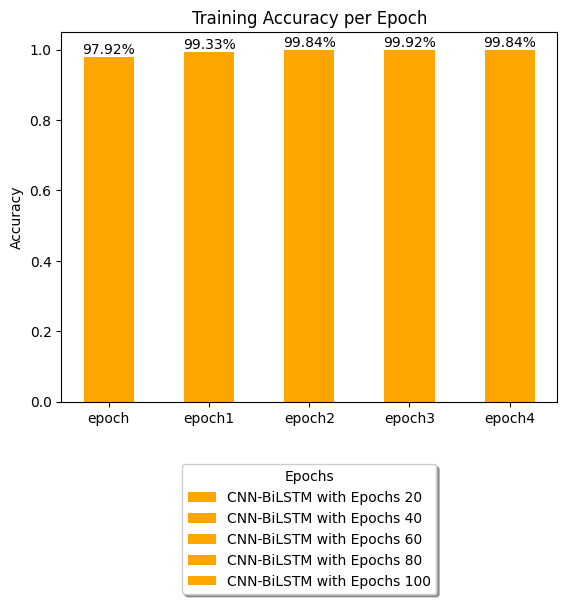

In [25]:
fig, ax = plt.subplots()

acc = history.history['accuracy'][-1]
acc1 = history1.history['accuracy'][-1]
acc2 = history2.history['accuracy'][-1]
acc3 = history3.history['accuracy'][-1]
acc4 = history4.history['accuracy'][-1]
accu_all=[acc, acc1, acc2, acc3, acc4]
epoch = len(history.history['accuracy']) 
epoch1 = len(history1.history['accuracy'])
epoch2 = len(history2.history['accuracy'])
epoch3 = len(history3.history['accuracy'])
epoch4 = len(history4.history['accuracy'])
epochs = ['epoch', 'epoch1', 'epoch2', 'epoch3','epoch4']
bar_labels = ['CNN-BiLSTM with Epochs 20', 'CNN-BiLSTM with Epochs 40', 'CNN-BiLSTM with Epochs 60', 'CNN-BiLSTM with Epochs 80', 'CNN-BiLSTM with Epochs 100']
bar_colors = ['orange', 'orange', 'orange', 'orange','orange']
ax.bar(epochs, accu_all, label=bar_labels, color=bar_colors,width=0.5)
ax.set_ylabel('Accuracy')
ax.set_title('Training Accuracy per Epoch')
ax.legend(title='Epochs', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=1)
for i, ac in enumerate(accu_all):
    plt.text(epochs[i], ac, f'{ac:.2%}', ha='center', va='bottom')
plt.show()
# train_acc = (history.history['accuracy'], history1.history['accuracy'], history2.history['accuracy'], history3.history['accuracy'])
# plt.plot(epochs, acc_all, 'b')
# plt.title('Training Accuracy per Epoch')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')

# plt.show()

In [27]:
img = cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0014.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [28]:
img_array = img_array.reshape(1, 150, 150, 3)
img_array.shape

(1, 150, 150, 3)

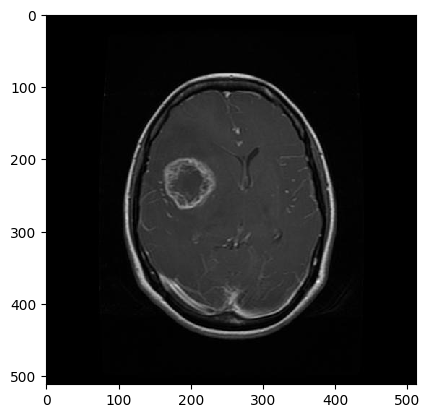

In [29]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0014.jpg')
plt.imshow(img, interpolation='nearest')
plt.show()

In [31]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


0

In [32]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(Y_test,axis=1)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [33]:
cm = confusion_matrix(y_true,pred)
print(cm)

[[330  16   0   2]
 [ 35 264  12  18]
 [  2   4 400   5]
 [  0   0   0 317]]


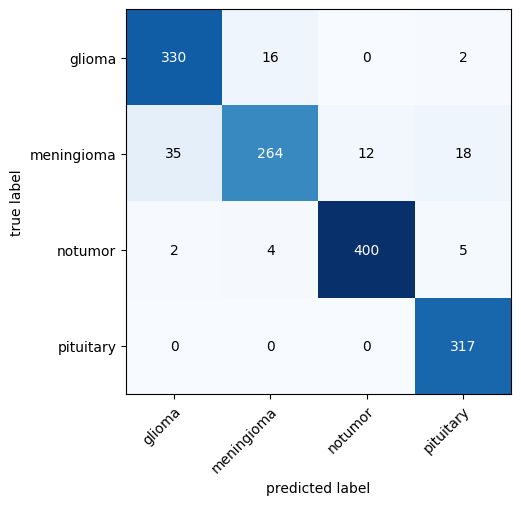

In [34]:
from mlxtend.plotting import plot_confusion_matrix
ax = plot_confusion_matrix(conf_mat=cm,figsize=(5,5),class_names=labels)
plt.show()

In [35]:
from sklearn.metrics import classification_report
cr = classification_report(y_true,pred,target_names=labels)
print(cr)

              precision    recall  f1-score   support

      glioma       0.90      0.95      0.92       348
  meningioma       0.93      0.80      0.86       329
     notumor       0.97      0.97      0.97       411
   pituitary       0.93      1.00      0.96       317

    accuracy                           0.93      1405
   macro avg       0.93      0.93      0.93      1405
weighted avg       0.93      0.93      0.93      1405



In [36]:
model.save('braintumor.keras')

For 70% Training Percentage

In [45]:
X_train1 = []
Y_train1 = []
image_size1 = 150
labels1 = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in labels1:
    folderPath1 = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Training', i)
    for j in os.listdir(folderPath1):
        img1 = cv2.imread(os.path.join(folderPath1, j))
        img1 = cv2.resize(img1, (image_size1, image_size1))
        X_train1.append(img1)
        Y_train1.append(i)
        
for i in labels1:
    folderPath1 = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Testing', i)
    for j in os.listdir(folderPath1):
        img1 = cv2.imread(os.path.join(folderPath1, j))
        img1 = cv2.resize(img1, (image_size1, image_size1))
        X_train1.append(img1)
        Y_train1.append(i)
        
X_train1 = np.array(X_train1)
Y_train1 = np.array(Y_train1)

In [46]:
X_train1, Y_train1 = shuffle(X_train1, Y_train1, random_state=101)
X_train1.shape

(7023, 150, 150, 3)

In [47]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_train1, Y_train1, test_size=0.3, random_state=101)

In [48]:
X_train1.shape

(4916, 150, 150, 3)

In [49]:
X_test1.shape

(2107, 150, 150, 3)

In [50]:
Y_train1_new = []
for i in Y_train1:
    Y_train1_new.append(labels1.index(i))
Y_train1=Y_train1_new
Y_train1 = tf.keras.utils.to_categorical(Y_train1)

Y_test1_new = []
for i in Y_test1:
    Y_test1_new.append(labels1.index(i))
Y_test1=Y_test1_new
Y_test1 = tf.keras.utils.to_categorical(Y_test1)

In [52]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(150, 150, 3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Reshape((36, 2304)))

lstm_fw = LSTM(units = 32)
lstm_bw = LSTM(units = 32, go_backwards = True)

model1.add(Bidirectional(lstm_fw, backward_layer=lstm_bw))

model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(4, activation='softmax'))

In [53]:
model1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 149, 149, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 149, 149, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 73, 73, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 73, 73, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_5 (Reshape)             │ (None, 36, 2304)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 64)             │       598,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642,660 (2.45 MB)

 Trainable params: 642,468 (2.45 MB)

 Non-trainable params: 192 (768.00 B)

In [54]:
model1.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [55]:
history_0 = model1.fit(X_train1, Y_train1, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20


2024-03-24 05:39:23.136561: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_5_1/dropout_15_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


111/111 - 8s - 69ms/step - accuracy: 0.6831 - loss: 0.7960 - val_accuracy: 0.4980 - val_loss: 1.2448
Epoch 2/20
111/111 - 4s - 37ms/step - accuracy: 0.8135 - loss: 0.4869 - val_accuracy: 0.6768 - val_loss: 0.8226
Epoch 3/20
111/111 - 4s - 37ms/step - accuracy: 0.8440 - loss: 0.4160 - val_accuracy: 0.6992 - val_loss: 0.6919
Epoch 4/20
111/111 - 4s - 37ms/step - accuracy: 0.8770 - loss: 0.3353 - val_accuracy: 0.7480 - val_loss: 0.5646
Epoch 5/20
111/111 - 4s - 37ms/step - accuracy: 0.8992 - loss: 0.2811 - val_accuracy: 0.7703 - val_loss: 0.5225
Epoch 6/20
111/111 - 4s - 37ms/step - accuracy: 0.9123 - loss: 0.2429 - val_accuracy: 0.8679 - val_loss: 0.3091
Epoch 7/20
111/111 - 4s - 37ms/step - accuracy: 0.9254 - loss: 0.2125 - val_accuracy: 0.8862 - val_loss: 0.2791
Epoch 8/20
111/111 - 4s - 37ms/step - accuracy: 0.9354 - loss: 0.1827 - val_accuracy: 0.8882 - val_loss: 0.2709
Epoch 9/20
111/111 - 4s - 37ms/step - accuracy: 0.9410 - loss: 0.1654 - val_accuracy: 0.8902 - val_loss: 0.2880
Epo

In [56]:
history_1 = model1.fit(X_train1, Y_train1, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
111/111 - 4s - 37ms/step - accuracy: 0.9864 - loss: 0.0423 - val_accuracy: 0.9167 - val_loss: 0.2176
Epoch 2/20
111/111 - 4s - 37ms/step - accuracy: 0.9844 - loss: 0.0441 - val_accuracy: 0.9065 - val_loss: 0.2497
Epoch 3/20
111/111 - 4s - 37ms/step - accuracy: 0.9871 - loss: 0.0387 - val_accuracy: 0.9228 - val_loss: 0.2321
Epoch 4/20
111/111 - 4s - 37ms/step - accuracy: 0.9892 - loss: 0.0313 - val_accuracy: 0.9187 - val_loss: 0.2191
Epoch 5/20
111/111 - 4s - 37ms/step - accuracy: 0.9882 - loss: 0.0331 - val_accuracy: 0.9207 - val_loss: 0.2006
Epoch 6/20
111/111 - 4s - 37ms/step - accuracy: 0.9901 - loss: 0.0317 - val_accuracy: 0.9248 - val_loss: 0.1967
Epoch 7/20
111/111 - 4s - 37ms/step - accuracy: 0.9914 - loss: 0.0263 - val_accuracy: 0.9370 - val_loss: 0.1947
Epoch 8/20
111/111 - 4s - 37ms/step - accuracy: 0.9928 - loss: 0.0233 - val_accuracy: 0.9106 - val_loss: 0.2332
Epoch 9/20
111/111 - 4s - 37ms/step - accuracy: 0.9937 - loss: 0.0211 - val_accuracy: 0.9187 - val_loss:

In [57]:
history_2 = model1.fit(X_train1, Y_train1, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
111/111 - 4s - 37ms/step - accuracy: 0.9959 - loss: 0.0118 - val_accuracy: 0.9248 - val_loss: 0.2233
Epoch 2/20
111/111 - 4s - 37ms/step - accuracy: 0.9982 - loss: 0.0087 - val_accuracy: 0.9268 - val_loss: 0.2201
Epoch 3/20
111/111 - 4s - 37ms/step - accuracy: 0.9971 - loss: 0.0103 - val_accuracy: 0.9370 - val_loss: 0.2206
Epoch 4/20
111/111 - 4s - 37ms/step - accuracy: 0.9957 - loss: 0.0149 - val_accuracy: 0.9268 - val_loss: 0.2058
Epoch 5/20
111/111 - 4s - 37ms/step - accuracy: 0.9984 - loss: 0.0081 - val_accuracy: 0.9329 - val_loss: 0.2059
Epoch 6/20
111/111 - 4s - 37ms/step - accuracy: 0.9989 - loss: 0.0053 - val_accuracy: 0.9350 - val_loss: 0.1957
Epoch 7/20
111/111 - 4s - 37ms/step - accuracy: 0.9986 - loss: 0.0051 - val_accuracy: 0.9370 - val_loss: 0.2110
Epoch 8/20
111/111 - 4s - 37ms/step - accuracy: 0.9989 - loss: 0.0052 - val_accuracy: 0.9350 - val_loss: 0.2154
Epoch 9/20
111/111 - 4s - 37ms/step - accuracy: 0.9982 - loss: 0.0080 - val_accuracy: 0.9268 - val_loss:

In [58]:
history_3 = model1.fit(X_train1, Y_train1, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
111/111 - 4s - 37ms/step - accuracy: 0.9973 - loss: 0.0076 - val_accuracy: 0.9228 - val_loss: 0.2573
Epoch 2/20
111/111 - 4s - 37ms/step - accuracy: 0.9984 - loss: 0.0069 - val_accuracy: 0.9268 - val_loss: 0.2608
Epoch 3/20
111/111 - 4s - 37ms/step - accuracy: 0.9975 - loss: 0.0063 - val_accuracy: 0.9207 - val_loss: 0.2855
Epoch 4/20
111/111 - 4s - 37ms/step - accuracy: 0.9975 - loss: 0.0071 - val_accuracy: 0.9146 - val_loss: 0.2723
Epoch 5/20
111/111 - 4s - 37ms/step - accuracy: 0.9982 - loss: 0.0068 - val_accuracy: 0.9268 - val_loss: 0.2441
Epoch 6/20
111/111 - 4s - 37ms/step - accuracy: 0.9986 - loss: 0.0043 - val_accuracy: 0.9248 - val_loss: 0.2364
Epoch 7/20
111/111 - 4s - 37ms/step - accuracy: 0.9982 - loss: 0.0052 - val_accuracy: 0.9228 - val_loss: 0.2534
Epoch 8/20
111/111 - 4s - 37ms/step - accuracy: 0.9986 - loss: 0.0042 - val_accuracy: 0.9228 - val_loss: 0.2721
Epoch 9/20
111/111 - 4s - 37ms/step - accuracy: 0.9986 - loss: 0.0038 - val_accuracy: 0.9309 - val_loss:

In [59]:
history_4 = model1.fit(X_train1, Y_train1, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
111/111 - 4s - 37ms/step - accuracy: 0.9982 - loss: 0.0054 - val_accuracy: 0.9329 - val_loss: 0.2414
Epoch 2/20
111/111 - 4s - 37ms/step - accuracy: 0.9989 - loss: 0.0037 - val_accuracy: 0.9268 - val_loss: 0.2600
Epoch 3/20
111/111 - 4s - 37ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9289 - val_loss: 0.2558
Epoch 4/20
111/111 - 4s - 37ms/step - accuracy: 0.9993 - loss: 0.0026 - val_accuracy: 0.9329 - val_loss: 0.2318
Epoch 5/20
111/111 - 4s - 37ms/step - accuracy: 0.9993 - loss: 0.0026 - val_accuracy: 0.9350 - val_loss: 0.2226
Epoch 6/20
111/111 - 4s - 37ms/step - accuracy: 0.9991 - loss: 0.0037 - val_accuracy: 0.9370 - val_loss: 0.2258
Epoch 7/20
111/111 - 4s - 37ms/step - accuracy: 0.9991 - loss: 0.0031 - val_accuracy: 0.9350 - val_loss: 0.2574
Epoch 8/20
111/111 - 4s - 37ms/step - accuracy: 0.9975 - loss: 0.0061 - val_accuracy: 0.9329 - val_loss: 0.2378
Epoch 9/20
111/111 - 4s - 37ms/step - accuracy: 0.9980 - loss: 0.0050 - val_accuracy: 0.9329 - val_loss:

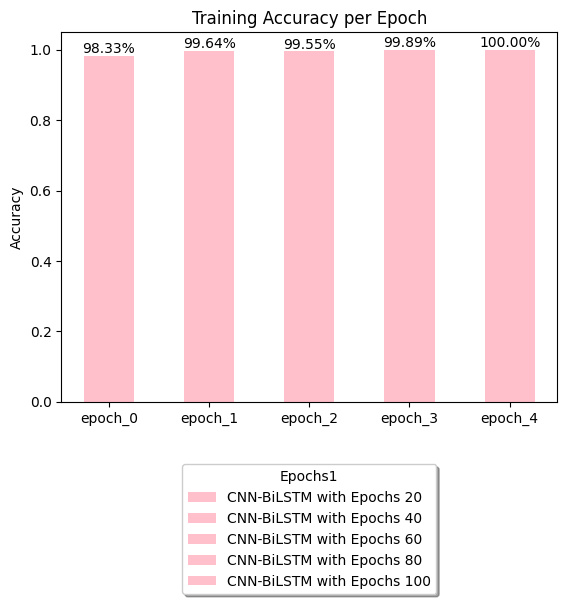

In [60]:
fig, ax1 = plt.subplots()

acc_0 = history_0.history['accuracy'][-1]
acc_1 = history_1.history['accuracy'][-1]
acc_2 = history_2.history['accuracy'][-1]
acc_3 = history_3.history['accuracy'][-1]
acc_4 = history_4.history['accuracy'][-1]
accu__all=[acc_0, acc_1, acc_2, acc_3, acc_4]
epoch_0 = len(history_0.history['accuracy']) 
epoch_1 = len(history_1.history['accuracy'])
epoch_2 = len(history_2.history['accuracy'])
epoch_3 = len(history_3.history['accuracy'])
epoch_4 = len(history_4.history['accuracy'])
epochs1 = ['epoch_0', 'epoch_1', 'epoch_2', 'epoch_3','epoch_4']
bar_labels = ['CNN-BiLSTM with Epochs 20', 'CNN-BiLSTM with Epochs 40', 'CNN-BiLSTM with Epochs 60', 'CNN-BiLSTM with Epochs 80', 'CNN-BiLSTM with Epochs 100']
bar_colors = ['pink', 'pink', 'pink', 'pink','pink']
ax1.bar(epochs1, accu__all, label=bar_labels, color=bar_colors,width=0.5)
ax1.set_ylabel('Accuracy')
ax1.set_title('Training Accuracy per Epoch')
ax1.legend(title='Epochs1', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=1)
for i, ac in enumerate(accu__all):
    plt.text(epochs1[i], ac, f'{ac:.2%}', ha='center', va='bottom')
plt.show()
# train_acc = (history.history['accuracy'], history1.history['accuracy'], history2.history['accuracy'], history3.history['accuracy'])
# plt.plot(epochs, acc_all, 'b')
# plt.title('Training Accuracy per Epoch')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')

# plt.show()

In [61]:
img1 = cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0014.jpg')
img1 = cv2.resize(img1,(150,150))
img_array1 = np.array(img1)
img_array1.shape

(150, 150, 3)

In [62]:
img_array1 = img_array1.reshape(1, 150, 150, 3)
img_array1.shape

(1, 150, 150, 3)

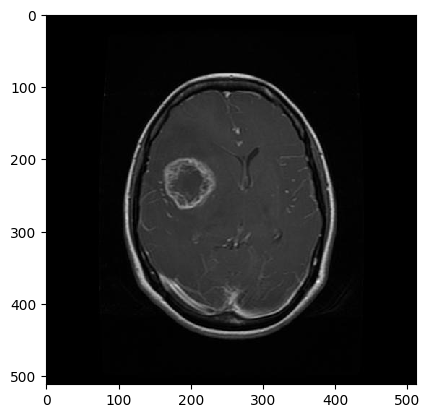

In [63]:
from tensorflow.keras.preprocessing import image
img1 = image.load_img('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0014.jpg')
plt.imshow(img1, interpolation='nearest')
plt.show()

In [64]:
a1=model1.predict(img_array1)
indices1 = a1.argmax()
indices1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


0

In [142]:
from sklearn.metrics import confusion_matrix
pred1 = model1.predict(X_test1)
pred1 = np.argmax(pred1,axis=1)
y_true1 = np.argmax(Y_test1,axis=1)

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [143]:
cm1 = confusion_matrix(y_true1,pred1)
print(cm1)

[[  0 518   0   0]
 [  0 493   0   0]
 [  0 608   0   0]
 [  0 488   0   0]]


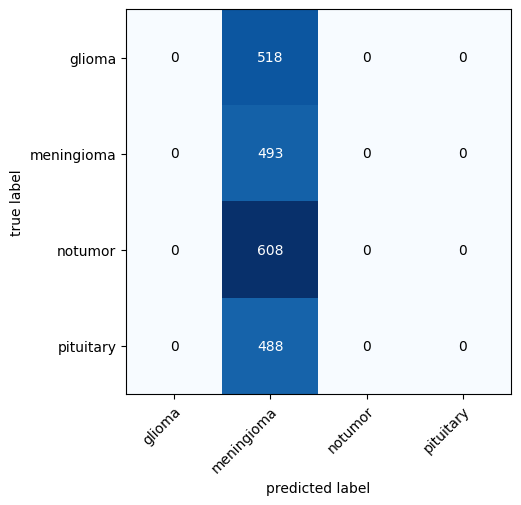

In [144]:
from mlxtend.plotting import plot_confusion_matrix
ax1 = plot_confusion_matrix(conf_mat=cm1,figsize=(5,5),class_names=labels1)
plt.show()

In [146]:
from sklearn.metrics import classification_report
cr1 = classification_report(y_true1,pred1,target_names=labels1)
print(cr1)

              precision    recall  f1-score   support

      glioma       0.00      0.00      0.00       518
  meningioma       0.23      1.00      0.38       493
     notumor       0.00      0.00      0.00       608
   pituitary       0.00      0.00      0.00       488

    accuracy                           0.23      2107
   macro avg       0.06      0.25      0.09      2107
weighted avg       0.05      0.23      0.09      2107



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [148]:
model1.save('braintumor.keras')

For 60% Training Percentage

In [109]:
X_train2 = []
Y_train2 = []
image_size2 = 150
labels2 = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in labels2:
    folderPath2 = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Training', i)
    for j in os.listdir(folderPath2):
        img2 = cv2.imread(os.path.join(folderPath2, j))
        img2 = cv2.resize(img2, (image_size2, image_size2))
        X_train2.append(img2)
        Y_train2.append(i)
        
for i in labels2:
    folderPath2 = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Testing', i)
    for j in os.listdir(folderPath2):
        img2 = cv2.imread(os.path.join(folderPath2, j))
        img2 = cv2.resize(img2, (image_size2, image_size2))
        X_train2.append(img2)
        Y_train2.append(i)
        
X_train2 = np.array(X_train2)
Y_train2 = np.array(Y_train2)

In [111]:
X_train2,Y_train2 = shuffle(X_train2,Y_train2,random_state=101)
X_train2.shape

(7023, 150, 150, 3)

In [114]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_train2, Y_train2, test_size=0.4, random_state=101)

In [115]:
X_train2.shape

(1516, 150, 150, 3)

In [116]:
X_test2.shape

(1011, 150, 150, 3)

In [117]:
Y_train2_new = []
for i in Y_train2:
    Y_train2_new.append(labels2.index(i))
Y_train2=Y_train2_new
Y_train2 = tf.keras.utils.to_categorical(Y_train2)

Y_test2_new = []
for i in Y_test2:
    Y_test2_new.append(labels2.index(i))
Y_test2 = Y_test2_new
Y_test2 = tf.keras.utils.to_categorical(Y_test2)

In [123]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(150, 150, 3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Reshape((36, 2304)))

lstm_fw = LSTM(units = 32)
lstm_bw = LSTM(units = 32, go_backwards = True)

model2.add(Bidirectional(lstm_fw, backward_layer=lstm_bw))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(4, activation='softmax'))

In [124]:
model2.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 149, 149, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 149, 149, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 73, 73, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 73, 73, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_12 (Reshape)            │ (None, 36, 2304)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_12                │ (None, 64)             │       598,272 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642,660 (2.45 MB)

 Trainable params: 642,468 (2.45 MB)

 Non-trainable params: 192 (768.00 B)

In [125]:
model2.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [126]:
history__0 = model2.fit(X_train2, Y_train2, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20


2024-03-24 06:26:18.846962: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_12_1/dropout_33_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


35/35 - 5s - 139ms/step - accuracy: 0.5616 - loss: 1.0271 - val_accuracy: 0.2829 - val_loss: 1.8503
Epoch 2/20
35/35 - 1s - 38ms/step - accuracy: 0.7236 - loss: 0.7053 - val_accuracy: 0.2895 - val_loss: 1.9525
Epoch 3/20
35/35 - 1s - 38ms/step - accuracy: 0.7757 - loss: 0.5969 - val_accuracy: 0.4868 - val_loss: 1.2784
Epoch 4/20
35/35 - 3s - 73ms/step - accuracy: 0.8043 - loss: 0.5175 - val_accuracy: 0.5395 - val_loss: 1.1093
Epoch 5/20
35/35 - 1s - 38ms/step - accuracy: 0.8328 - loss: 0.4556 - val_accuracy: 0.6184 - val_loss: 0.8117
Epoch 6/20
35/35 - 1s - 38ms/step - accuracy: 0.8394 - loss: 0.4110 - val_accuracy: 0.6447 - val_loss: 0.8587
Epoch 7/20
35/35 - 1s - 38ms/step - accuracy: 0.8541 - loss: 0.3902 - val_accuracy: 0.7171 - val_loss: 0.7242
Epoch 8/20
35/35 - 1s - 38ms/step - accuracy: 0.8739 - loss: 0.4012 - val_accuracy: 0.6908 - val_loss: 0.7247
Epoch 9/20
35/35 - 1s - 38ms/step - accuracy: 0.8886 - loss: 0.3049 - val_accuracy: 0.7303 - val_loss: 0.6397
Epoch 10/20
35/35 - 

In [128]:
history__1 = model2.fit(X_train2, Y_train2, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
35/35 - 1s - 39ms/step - accuracy: 0.9582 - loss: 0.1239 - val_accuracy: 0.8158 - val_loss: 0.4801
Epoch 2/20
35/35 - 1s - 38ms/step - accuracy: 0.9677 - loss: 0.1144 - val_accuracy: 0.7829 - val_loss: 0.5167
Epoch 3/20
35/35 - 1s - 38ms/step - accuracy: 0.9663 - loss: 0.1091 - val_accuracy: 0.7895 - val_loss: 0.4699
Epoch 4/20
35/35 - 1s - 38ms/step - accuracy: 0.9699 - loss: 0.1044 - val_accuracy: 0.8355 - val_loss: 0.4112
Epoch 5/20
35/35 - 1s - 38ms/step - accuracy: 0.9692 - loss: 0.0978 - val_accuracy: 0.7895 - val_loss: 0.5076
Epoch 6/20
35/35 - 1s - 38ms/step - accuracy: 0.9692 - loss: 0.1037 - val_accuracy: 0.7632 - val_loss: 0.5276
Epoch 7/20
35/35 - 1s - 38ms/step - accuracy: 0.9736 - loss: 0.0851 - val_accuracy: 0.7500 - val_loss: 0.5985
Epoch 8/20
35/35 - 1s - 38ms/step - accuracy: 0.9809 - loss: 0.0752 - val_accuracy: 0.7697 - val_loss: 0.5150
Epoch 9/20
35/35 - 1s - 38ms/step - accuracy: 0.9809 - loss: 0.0661 - val_accuracy: 0.7697 - val_loss: 0.5295
Epoch 10/2

In [129]:
history__2 = model2.fit(X_train2, Y_train2, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
35/35 - 1s - 39ms/step - accuracy: 0.9941 - loss: 0.0373 - val_accuracy: 0.7697 - val_loss: 0.5550
Epoch 2/20
35/35 - 1s - 38ms/step - accuracy: 0.9927 - loss: 0.0359 - val_accuracy: 0.7829 - val_loss: 0.5289
Epoch 3/20
35/35 - 1s - 38ms/step - accuracy: 0.9941 - loss: 0.0321 - val_accuracy: 0.7829 - val_loss: 0.5137
Epoch 4/20
35/35 - 1s - 38ms/step - accuracy: 0.9934 - loss: 0.0290 - val_accuracy: 0.7763 - val_loss: 0.5329
Epoch 5/20
35/35 - 1s - 38ms/step - accuracy: 0.9919 - loss: 0.0494 - val_accuracy: 0.7961 - val_loss: 0.5360
Epoch 6/20
35/35 - 1s - 38ms/step - accuracy: 0.9941 - loss: 0.0264 - val_accuracy: 0.8026 - val_loss: 0.4889
Epoch 7/20
35/35 - 1s - 38ms/step - accuracy: 0.9949 - loss: 0.0278 - val_accuracy: 0.7895 - val_loss: 0.5358
Epoch 8/20
35/35 - 1s - 38ms/step - accuracy: 0.9956 - loss: 0.0232 - val_accuracy: 0.7829 - val_loss: 0.5268
Epoch 9/20
35/35 - 1s - 37ms/step - accuracy: 0.9971 - loss: 0.0209 - val_accuracy: 0.7763 - val_loss: 0.5414
Epoch 10/2

In [132]:
history__3 = model2.fit(X_train2, Y_train2, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
35/35 - 1s - 39ms/step - accuracy: 0.9993 - loss: 0.0099 - val_accuracy: 0.8289 - val_loss: 0.4731
Epoch 2/20
35/35 - 1s - 38ms/step - accuracy: 1.0000 - loss: 0.0098 - val_accuracy: 0.8026 - val_loss: 0.4904
Epoch 3/20
35/35 - 1s - 38ms/step - accuracy: 0.9978 - loss: 0.0119 - val_accuracy: 0.8553 - val_loss: 0.4583
Epoch 4/20
35/35 - 1s - 38ms/step - accuracy: 0.9985 - loss: 0.0148 - val_accuracy: 0.8158 - val_loss: 0.4824
Epoch 5/20
35/35 - 1s - 38ms/step - accuracy: 0.9985 - loss: 0.0120 - val_accuracy: 0.7895 - val_loss: 0.5981
Epoch 6/20
35/35 - 1s - 38ms/step - accuracy: 0.9978 - loss: 0.0165 - val_accuracy: 0.8026 - val_loss: 0.5374
Epoch 7/20
35/35 - 1s - 38ms/step - accuracy: 0.9971 - loss: 0.0131 - val_accuracy: 0.8026 - val_loss: 0.4999
Epoch 8/20
35/35 - 1s - 38ms/step - accuracy: 0.9985 - loss: 0.0451 - val_accuracy: 0.7961 - val_loss: 0.5464
Epoch 9/20
35/35 - 1s - 38ms/step - accuracy: 0.9978 - loss: 0.0106 - val_accuracy: 0.8026 - val_loss: 0.5943
Epoch 10/2

In [134]:
history__4 = model2.fit(X_train2, Y_train2, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
35/35 - 1s - 39ms/step - accuracy: 0.9978 - loss: 0.0127 - val_accuracy: 0.8158 - val_loss: 0.4982
Epoch 2/20
35/35 - 1s - 38ms/step - accuracy: 0.9978 - loss: 0.0109 - val_accuracy: 0.8158 - val_loss: 0.5021
Epoch 3/20
35/35 - 1s - 37ms/step - accuracy: 0.9971 - loss: 0.0119 - val_accuracy: 0.8092 - val_loss: 0.5438
Epoch 4/20
35/35 - 1s - 37ms/step - accuracy: 0.9985 - loss: 0.0079 - val_accuracy: 0.8224 - val_loss: 0.5214
Epoch 5/20
35/35 - 1s - 37ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.8158 - val_loss: 0.5254
Epoch 6/20
35/35 - 1s - 37ms/step - accuracy: 0.9985 - loss: 0.0137 - val_accuracy: 0.8553 - val_loss: 0.4419
Epoch 7/20
35/35 - 1s - 38ms/step - accuracy: 0.9949 - loss: 0.0191 - val_accuracy: 0.8421 - val_loss: 0.4686
Epoch 8/20
35/35 - 1s - 38ms/step - accuracy: 0.9956 - loss: 0.0126 - val_accuracy: 0.8750 - val_loss: 0.4389
Epoch 9/20
35/35 - 1s - 38ms/step - accuracy: 0.9971 - loss: 0.0108 - val_accuracy: 0.8224 - val_loss: 0.5249
Epoch 10/2

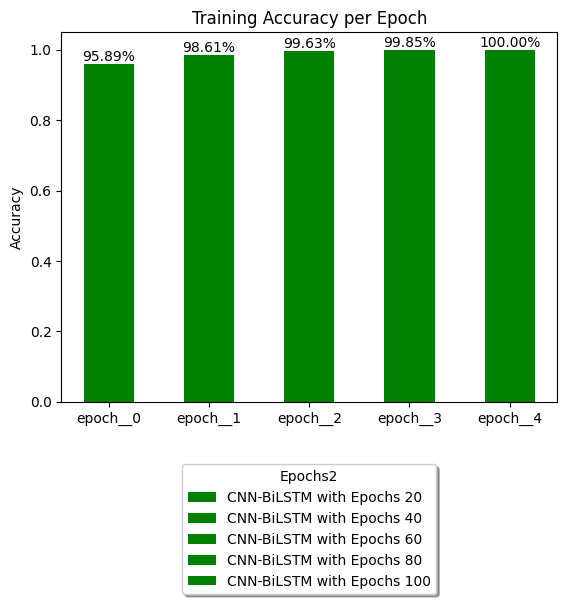

In [135]:
fig, ax2 = plt.subplots()

acc__0 = history__0.history['accuracy'][-1]
acc__1 = history__1.history['accuracy'][-1]
acc__2 = history__2.history['accuracy'][-1]
acc__3 = history__3.history['accuracy'][-1]
acc__4 = history__4.history['accuracy'][-1]
accu___all=[acc__0, acc__1, acc__2, acc__3, acc__4]
epoch__0 = len(history__0.history['accuracy']) 
epoch__1 = len(history__1.history['accuracy'])
epoch__2 = len(history__2.history['accuracy'])
epoch__3 = len(history__3.history['accuracy'])
epoch__4 = len(history__4.history['accuracy'])
epochs2 = ['epoch__0', 'epoch__1', 'epoch__2', 'epoch__3','epoch__4']
bar_labels = ['CNN-BiLSTM with Epochs 20', 'CNN-BiLSTM with Epochs 40', 'CNN-BiLSTM with Epochs 60', 'CNN-BiLSTM with Epochs 80', 'CNN-BiLSTM with Epochs 100']
bar_colors = ['green', 'green', 'green', 'green','green']
ax2.bar(epochs2, accu___all, label=bar_labels, color=bar_colors,width=0.5)
ax2.set_ylabel('Accuracy')
ax2.set_title('Training Accuracy per Epoch')
ax2.legend(title='Epochs2', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=1)
for i, ac in enumerate(accu___all):
    plt.text(epochs2[i], ac, f'{ac:.2%}', ha='center', va='bottom')
plt.show()

In [137]:
img2 = cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0014.jpg')
img2 = cv2.resize(img2,(150,150))
img_array2 = np.array(img2)
img_array2.shape

(150, 150, 3)

In [138]:
img_array2 = img_array2.reshape(1, 150, 150, 3)
img_array2.shape

(1, 150, 150, 3)

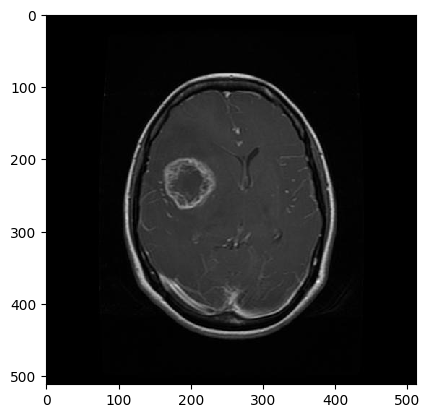

In [139]:
from tensorflow.keras.preprocessing import image
img2 = image.load_img('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0014.jpg')
plt.imshow(img2, interpolation='nearest')
plt.show()

In [140]:
a2=model2.predict(img_array2)
indices2 = a2.argmax()
indices2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


0

In [149]:
from sklearn.metrics import confusion_matrix
pred2 = model2.predict(X_test2)
pred2 = np.argmax(pred2,axis=1)
y_true2 = np.argmax(Y_test2,axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [150]:
cm2 = confusion_matrix(y_true2,pred2)
print(cm2)

[[214  15   1   4]
 [ 62 111  20  21]
 [  0  10 273   6]
 [  4   7   0 263]]


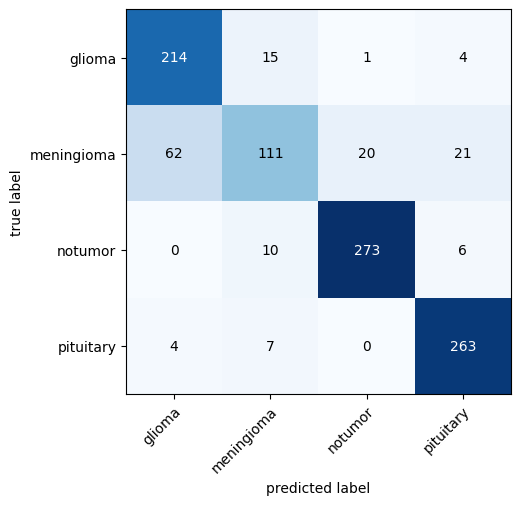

In [151]:
from mlxtend.plotting import plot_confusion_matrix
ax2 = plot_confusion_matrix(conf_mat=cm2,figsize=(5,5),class_names=labels2)
plt.show()

In [152]:
from sklearn.metrics import classification_report
cr2 = classification_report(y_true2,pred2,target_names=labels2)
print(cr2)

              precision    recall  f1-score   support

      glioma       0.76      0.91      0.83       234
  meningioma       0.78      0.52      0.62       214
     notumor       0.93      0.94      0.94       289
   pituitary       0.89      0.96      0.93       274

    accuracy                           0.85      1011
   macro avg       0.84      0.83      0.83      1011
weighted avg       0.85      0.85      0.84      1011



In [153]:
model2.save('braintumor.keras')

For 50% Training Percentage

In [165]:
X_train3 = []
Y_train3 = []
image_size3 = 150
labels3 = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in labels3:
    folderPath3 = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Training', i)
    for j in os.listdir(folderPath3):
        img3 = cv2.imread(os.path.join(folderPath3, j))
        img3 = cv2.resize(img3, (image_size3, image_size3))
        X_train3.append(img3)
        Y_train3.append(i)
        
for i in labels3:
    folderPath3 = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Testing', i)
    for j in os.listdir(folderPath3):
        img3 = cv2.imread(os.path.join(folderPath3, j))
        img3 = cv2.resize(img3, (image_size3, image_size3))
        X_train3.append(img3)
        Y_train3.append(i)
        
X_train3 = np.array(X_train3)
Y_train3 = np.array(Y_train3)

In [167]:
X_train3, Y_train3 = shuffle(X_train3, Y_train3, random_state=101)
X_train3.shape

(7023, 150, 150, 3)

In [169]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_train3, Y_train3, test_size=0.5, random_state=101)

In [170]:
X_train3.shape

(1755, 150, 150, 3)

In [171]:
X_test3.shape

(1756, 150, 150, 3)

In [172]:
Y_train3_new = []
for i in Y_train3:
    Y_train3_new.append(labels3.index(i))
Y_train3=Y_train3_new
Y_train3 = tf.keras.utils.to_categorical(Y_train3)

Y_test3_new = []
for i in Y_test3:
    Y_test3_new.append(labels3.index(i))
Y_test3=Y_test3_new
Y_test3 = tf.keras.utils.to_categorical(Y_test3)

In [174]:
model3 = tf.keras.Sequential()
model3.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(150, 150, 3)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(4, activation='softmax'))

In [175]:
model3.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 149, 149, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 149, 149, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 73, 73, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 73, 73, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │    42,467,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,478,948 (162.04 MB)

 Trainable params: 42,478,756 (162.04 MB)

 Non-trainable params: 192 (768.00 B)

In [176]:
model3.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [177]:
history___0 = model3.fit(X_train3, Y_train3, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20


I0000 00:00:1711262952.555163      84 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711262952.577137      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711262959.537818      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


40/40 - 16s - 398ms/step - accuracy: 0.6371 - loss: 13.1178 - val_accuracy: 0.2670 - val_loss: 35.8605
Epoch 2/20
40/40 - 1s - 21ms/step - accuracy: 0.8068 - loss: 1.9842 - val_accuracy: 0.5227 - val_loss: 4.1698
Epoch 3/20
40/40 - 1s - 21ms/step - accuracy: 0.8904 - loss: 0.6536 - val_accuracy: 0.8636 - val_loss: 0.8338
Epoch 4/20
40/40 - 1s - 21ms/step - accuracy: 0.9297 - loss: 0.3216 - val_accuracy: 0.8466 - val_loss: 0.7570
Epoch 5/20
40/40 - 1s - 21ms/step - accuracy: 0.9493 - loss: 0.1942 - val_accuracy: 0.8523 - val_loss: 0.8257
Epoch 6/20
40/40 - 1s - 21ms/step - accuracy: 0.9538 - loss: 0.1599 - val_accuracy: 0.8580 - val_loss: 1.0192
Epoch 7/20
40/40 - 1s - 21ms/step - accuracy: 0.9753 - loss: 0.0844 - val_accuracy: 0.8693 - val_loss: 0.9408
Epoch 8/20
40/40 - 1s - 21ms/step - accuracy: 0.9873 - loss: 0.0550 - val_accuracy: 0.8580 - val_loss: 1.1382
Epoch 9/20
40/40 - 1s - 21ms/step - accuracy: 0.9791 - loss: 0.0655 - val_accuracy: 0.8523 - val_loss: 1.3122
Epoch 10/20
40/40

In [178]:
history___1 = model3.fit(X_train3, Y_train3, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
40/40 - 1s - 22ms/step - accuracy: 0.9943 - loss: 0.0155 - val_accuracy: 0.8466 - val_loss: 1.2421
Epoch 2/20
40/40 - 1s - 21ms/step - accuracy: 0.9968 - loss: 0.0121 - val_accuracy: 0.8409 - val_loss: 1.2589
Epoch 3/20
40/40 - 1s - 31ms/step - accuracy: 0.9987 - loss: 0.0091 - val_accuracy: 0.8466 - val_loss: 1.2166
Epoch 4/20
40/40 - 1s - 31ms/step - accuracy: 0.9962 - loss: 0.0086 - val_accuracy: 0.8466 - val_loss: 1.3466
Epoch 5/20
40/40 - 1s - 21ms/step - accuracy: 0.9962 - loss: 0.0488 - val_accuracy: 0.8409 - val_loss: 1.3815
Epoch 6/20
40/40 - 1s - 21ms/step - accuracy: 0.9911 - loss: 0.0240 - val_accuracy: 0.8466 - val_loss: 0.9427
Epoch 7/20
40/40 - 1s - 21ms/step - accuracy: 0.9968 - loss: 0.0148 - val_accuracy: 0.8295 - val_loss: 1.2474
Epoch 8/20
40/40 - 1s - 21ms/step - accuracy: 0.9949 - loss: 0.0195 - val_accuracy: 0.8580 - val_loss: 1.1463
Epoch 9/20
40/40 - 1s - 21ms/step - accuracy: 0.9994 - loss: 0.0080 - val_accuracy: 0.8466 - val_loss: 1.1823
Epoch 10/2

In [179]:
history___2 = model3.fit(X_train3, Y_train3, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
40/40 - 1s - 22ms/step - accuracy: 0.9975 - loss: 0.0075 - val_accuracy: 0.8807 - val_loss: 1.0087
Epoch 2/20
40/40 - 1s - 21ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.8807 - val_loss: 0.9813
Epoch 3/20
40/40 - 1s - 21ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.8807 - val_loss: 1.0143
Epoch 4/20
40/40 - 1s - 21ms/step - accuracy: 0.9987 - loss: 0.0056 - val_accuracy: 0.8580 - val_loss: 1.3718
Epoch 5/20
40/40 - 1s - 21ms/step - accuracy: 0.9981 - loss: 0.0043 - val_accuracy: 0.8523 - val_loss: 1.3630
Epoch 6/20
40/40 - 1s - 21ms/step - accuracy: 0.9994 - loss: 0.0056 - val_accuracy: 0.8693 - val_loss: 1.2162
Epoch 7/20
40/40 - 1s - 21ms/step - accuracy: 0.9994 - loss: 0.0047 - val_accuracy: 0.8580 - val_loss: 1.2199
Epoch 8/20
40/40 - 1s - 21ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.8580 - val_loss: 1.1899
Epoch 9/20
40/40 - 1s - 21ms/step - accuracy: 0.9994 - loss: 0.0079 - val_accuracy: 0.8580 - val_loss: 1.1662
Epoch 10/2

In [180]:
history___3 = model3.fit(X_train3, Y_train3, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
40/40 - 1s - 22ms/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 0.8580 - val_loss: 1.2286
Epoch 2/20
40/40 - 1s - 21ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.8636 - val_loss: 1.2318
Epoch 3/20
40/40 - 1s - 32ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.8693 - val_loss: 1.1385
Epoch 4/20
40/40 - 1s - 21ms/step - accuracy: 0.9994 - loss: 0.0017 - val_accuracy: 0.8636 - val_loss: 1.4007
Epoch 5/20
40/40 - 1s - 21ms/step - accuracy: 0.9987 - loss: 0.0032 - val_accuracy: 0.8636 - val_loss: 1.5502
Epoch 6/20
40/40 - 1s - 21ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.8580 - val_loss: 1.4660
Epoch 7/20
40/40 - 1s - 21ms/step - accuracy: 1.0000 - loss: 9.6749e-04 - val_accuracy: 0.8636 - val_loss: 1.4198
Epoch 8/20
40/40 - 1s - 21ms/step - accuracy: 0.9981 - loss: 0.0078 - val_accuracy: 0.8693 - val_loss: 1.2777
Epoch 9/20
40/40 - 1s - 21ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.8636 - val_loss: 1.4348
Epoch 

In [181]:
history___4 = model3.fit(X_train3, Y_train3, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
40/40 - 1s - 22ms/step - accuracy: 0.9987 - loss: 0.0032 - val_accuracy: 0.8580 - val_loss: 1.1784
Epoch 2/20
40/40 - 1s - 20ms/step - accuracy: 0.9981 - loss: 0.0063 - val_accuracy: 0.8409 - val_loss: 1.6903
Epoch 3/20
40/40 - 1s - 21ms/step - accuracy: 0.9987 - loss: 0.0052 - val_accuracy: 0.8523 - val_loss: 1.5999
Epoch 4/20
40/40 - 1s - 21ms/step - accuracy: 1.0000 - loss: 8.1113e-04 - val_accuracy: 0.8636 - val_loss: 1.4022
Epoch 5/20
40/40 - 1s - 21ms/step - accuracy: 1.0000 - loss: 4.8566e-04 - val_accuracy: 0.8636 - val_loss: 1.3477
Epoch 6/20
40/40 - 1s - 20ms/step - accuracy: 0.9981 - loss: 0.0072 - val_accuracy: 0.8636 - val_loss: 1.2741
Epoch 7/20
40/40 - 1s - 21ms/step - accuracy: 0.9975 - loss: 0.0040 - val_accuracy: 0.8580 - val_loss: 1.3609
Epoch 8/20
40/40 - 1s - 21ms/step - accuracy: 0.9987 - loss: 0.0061 - val_accuracy: 0.8523 - val_loss: 1.4523
Epoch 9/20
40/40 - 1s - 21ms/step - accuracy: 1.0000 - loss: 8.4029e-04 - val_accuracy: 0.8466 - val_loss: 1.416

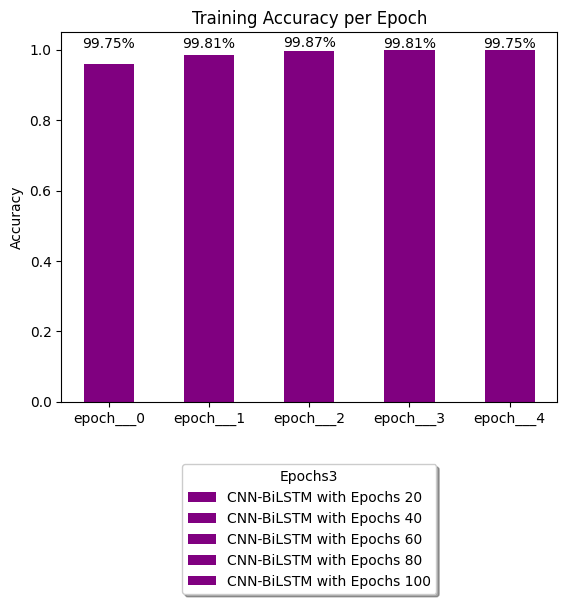

In [182]:
fig, ax3 = plt.subplots()

acc___0 = history___0.history['accuracy'][-1]
acc___1 = history___1.history['accuracy'][-1]
acc___2 = history___2.history['accuracy'][-1]
acc___3 = history___3.history['accuracy'][-1]
acc___4 = history___4.history['accuracy'][-1]
accu____all=[acc___0, acc___1, acc___2, acc___3, acc___4]
epoch___0 = len(history___0.history['accuracy']) 
epoch___1 = len(history___1.history['accuracy'])
epoch___2 = len(history___2.history['accuracy'])
epoch___3 = len(history___3.history['accuracy'])
epoch___4 = len(history___4.history['accuracy'])
epochs3 = ['epoch___0', 'epoch___1', 'epoch___2', 'epoch___3','epoch___4']
bar_labels = ['CNN-BiLSTM with Epochs 20', 'CNN-BiLSTM with Epochs 40', 'CNN-BiLSTM with Epochs 60', 'CNN-BiLSTM with Epochs 80', 'CNN-BiLSTM with Epochs 100']
bar_colors = ['purple', 'purple', 'purple', 'purple','purple']
ax3.bar(epochs3, accu___all, label=bar_labels, color=bar_colors,width=0.5)
ax3.set_ylabel('Accuracy')
ax3.set_title('Training Accuracy per Epoch')
ax3.legend(title='Epochs3', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=1)
for i, ac in enumerate(accu____all):
    plt.text(epochs3[i], ac, f'{ac:.2%}', ha='center', va='bottom')
plt.show()

# train_acc = (history.history['accuracy'], history1.history['accuracy'], history2.history['accuracy'], history3.history['accuracy'])
# plt.plot(epochs, acc_all, 'b')
# plt.title('Training Accuracy per Epoch')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')

# plt.show()

In [183]:
img3 = cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0014.jpg')
img3 = cv2.resize(img3,(150,150))
img_array3 = np.array(img3)
img_array3.shape

(150, 150, 3)

In [184]:
img_array3 = img_array3.reshape(1, 150, 150, 3)
img_array3.shape

(1, 150, 150, 3)

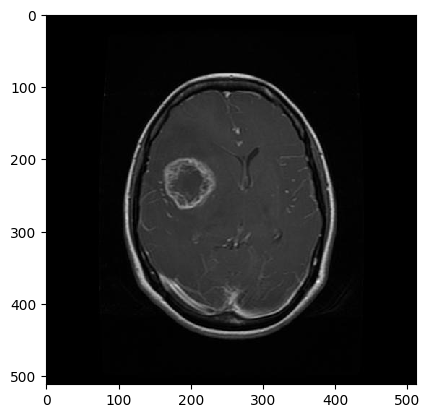

In [185]:
from tensorflow.keras.preprocessing import image
img3 = image.load_img('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0014.jpg')
plt.imshow(img3, interpolation='nearest')
plt.show()

In [186]:
a3=model3.predict(img_array3)
indices3 = a3.argmax()
indices3

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


0

In [188]:
from sklearn.metrics import confusion_matrix
pred3 = model3.predict(X_test3)
pred3 = np.argmax(pred3,axis=1)
y_true3 = np.argmax(Y_test3,axis=1)

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


In [189]:
cm3 = confusion_matrix(y_true3,pred3)
print(cm3)

[[352  13   0  23]
 [177 141  34  66]
 [  8  12 450  22]
 [ 17   4   0 437]]


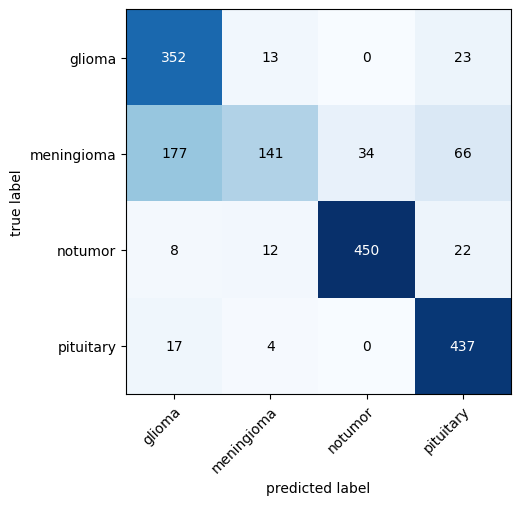

In [190]:
from mlxtend.plotting import plot_confusion_matrix
ax3 = plot_confusion_matrix(conf_mat=cm3,figsize=(5,5),class_names=labels3)
plt.show()

In [191]:
from sklearn.metrics import classification_report
cr3 = classification_report(y_true3,pred3,target_names=labels3)
print(cr3)

              precision    recall  f1-score   support

      glioma       0.64      0.91      0.75       388
  meningioma       0.83      0.34      0.48       418
     notumor       0.93      0.91      0.92       492
   pituitary       0.80      0.95      0.87       458

    accuracy                           0.79      1756
   macro avg       0.80      0.78      0.75      1756
weighted avg       0.81      0.79      0.76      1756



In [192]:
model3.save('braintumor.keras')

For 40% Training Percentage

In [194]:
X_train4 = []
Y_train4 = []
image_size4 = 150
labels4 = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in labels4:
    folderPath4 = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Training', i)
    for j in os.listdir(folderPath4):
        img4 = cv2.imread(os.path.join(folderPath4, j))
        img4 = cv2.resize(img4, (image_size4, image_size4))
        X_train4.append(img4)
        Y_train4.append(i)
        
for i in labels:
    folderPath4 = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Testing', i)
    for j in os.listdir(folderPath4):
        img4 = cv2.imread(os.path.join(folderPath4, j))
        img4 = cv2.resize(img4, (image_size4, image_size4))
        X_train4.append(img4)
        Y_train4.append(i)
        
X_train4 = np.array(X_train4)
Y_train4 = np.array(Y_train4)

In [195]:
X_train4, Y_train4 = shuffle(X_train4, Y_train4, random_state=101)
X_train4.shape

(7023, 150, 150, 3)

In [198]:
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X_train4, Y_train4, test_size=0.6, random_state=101)

In [199]:
X_train4.shape

(1123, 150, 150, 3)

In [200]:
X_test4.shape

(1686, 150, 150, 3)

In [201]:
Y_train4_new = []
for i in Y_train4:
    Y_train4_new.append(labels4.index(i))
Y_train4=Y_train4_new
Y_train4 = tf.keras.utils.to_categorical(Y_train4)

Y_test4_new = []
for i in Y_test4:
    Y_test4_new.append(labels4.index(i))
Y_test4=Y_test4_new
Y_test4 = tf.keras.utils.to_categorical(Y_test4)

In [203]:
model4 = tf.keras.Sequential()
model4.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(150, 150, 3)))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.25))
model4.add(Dense(4, activation='softmax'))

In [204]:
model4.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 149, 149, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 149, 149, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 73, 73, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 73, 73, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 512)            │    42,467,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,478,948 (162.04 MB)

 Trainable params: 42,478,756 (162.04 MB)

 Non-trainable params: 192 (768.00 B)

In [206]:
model4.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [207]:
history____0 = model4.fit(X_train4, Y_train4, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20


W0000 00:00:1711264854.424877      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711264861.282937      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 - 14s - 546ms/step - accuracy: 0.5683 - loss: 20.1653 - val_accuracy: 0.2566 - val_loss: 58.5016
Epoch 2/20
26/26 - 1s - 21ms/step - accuracy: 0.8139 - loss: 3.0395 - val_accuracy: 0.3274 - val_loss: 26.3704
Epoch 3/20
26/26 - 1s - 22ms/step - accuracy: 0.8604 - loss: 1.3028 - val_accuracy: 0.5133 - val_loss: 7.8519
Epoch 4/20
26/26 - 1s - 21ms/step - accuracy: 0.9109 - loss: 0.5430 - val_accuracy: 0.6018 - val_loss: 3.6492
Epoch 5/20
26/26 - 1s - 22ms/step - accuracy: 0.9366 - loss: 0.3755 - val_accuracy: 0.7168 - val_loss: 1.8852
Epoch 6/20
26/26 - 1s - 22ms/step - accuracy: 0.9604 - loss: 0.1765 - val_accuracy: 0.8230 - val_loss: 1.1972
Epoch 7/20
26/26 - 1s - 22ms/step - accuracy: 0.9624 - loss: 0.1384 - val_accuracy: 0.8407 - val_loss: 1.0613
Epoch 8/20
26/26 - 1s - 22ms/step - accuracy: 0.9683 - loss: 0.0843 - val_accuracy: 0.8584 - val_loss: 0.8547
Epoch 9/20
26/26 - 1s - 21ms/step - accuracy: 0.9842 - loss: 0.0935 - val_accuracy: 0.8673 - val_loss: 0.8220
Epoch 10/20
26/2

In [208]:
history____1 = model4.fit(X_train4, Y_train4, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
26/26 - 1s - 23ms/step - accuracy: 0.9891 - loss: 0.2744 - val_accuracy: 0.8230 - val_loss: 1.3028
Epoch 2/20
26/26 - 1s - 21ms/step - accuracy: 0.9921 - loss: 0.0315 - val_accuracy: 0.8407 - val_loss: 1.1156
Epoch 3/20
26/26 - 1s - 22ms/step - accuracy: 0.9911 - loss: 0.0286 - val_accuracy: 0.8496 - val_loss: 1.4811
Epoch 4/20
26/26 - 1s - 22ms/step - accuracy: 0.9901 - loss: 0.0480 - val_accuracy: 0.8584 - val_loss: 1.4730
Epoch 5/20
26/26 - 1s - 21ms/step - accuracy: 0.9911 - loss: 0.0222 - val_accuracy: 0.8407 - val_loss: 1.2977
Epoch 6/20
26/26 - 1s - 22ms/step - accuracy: 0.9970 - loss: 0.0082 - val_accuracy: 0.8496 - val_loss: 1.2631
Epoch 7/20
26/26 - 1s - 22ms/step - accuracy: 0.9980 - loss: 0.0083 - val_accuracy: 0.8496 - val_loss: 1.3345
Epoch 8/20
26/26 - 1s - 22ms/step - accuracy: 0.9970 - loss: 0.0105 - val_accuracy: 0.8761 - val_loss: 1.1020
Epoch 9/20
26/26 - 1s - 22ms/step - accuracy: 0.9960 - loss: 0.0124 - val_accuracy: 0.8761 - val_loss: 1.2335
Epoch 10/2

In [209]:
history____2 = model4.fit(X_train4, Y_train4, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
26/26 - 1s - 24ms/step - accuracy: 0.9970 - loss: 0.0099 - val_accuracy: 0.8142 - val_loss: 1.6306
Epoch 2/20
26/26 - 1s - 22ms/step - accuracy: 0.9980 - loss: 0.0077 - val_accuracy: 0.8407 - val_loss: 1.4592
Epoch 3/20
26/26 - 1s - 22ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.8407 - val_loss: 1.4828
Epoch 4/20
26/26 - 1s - 22ms/step - accuracy: 0.9970 - loss: 0.0072 - val_accuracy: 0.8407 - val_loss: 1.4615
Epoch 5/20
26/26 - 1s - 22ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.8319 - val_loss: 1.5077
Epoch 6/20
26/26 - 1s - 22ms/step - accuracy: 0.9950 - loss: 0.0086 - val_accuracy: 0.8407 - val_loss: 1.5720
Epoch 7/20
26/26 - 1s - 22ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.8407 - val_loss: 1.4887
Epoch 8/20
26/26 - 1s - 21ms/step - accuracy: 0.9980 - loss: 0.0108 - val_accuracy: 0.8496 - val_loss: 1.4608
Epoch 9/20
26/26 - 1s - 22ms/step - accuracy: 0.9950 - loss: 0.0091 - val_accuracy: 0.8319 - val_loss: 1.6425
Epoch 10/2

In [210]:
history____3 = model4.fit(X_train4, Y_train4, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
26/26 - 1s - 24ms/step - accuracy: 0.9990 - loss: 0.0079 - val_accuracy: 0.8407 - val_loss: 1.4283
Epoch 2/20
26/26 - 1s - 22ms/step - accuracy: 0.9980 - loss: 0.0054 - val_accuracy: 0.8407 - val_loss: 1.3957
Epoch 3/20
26/26 - 1s - 22ms/step - accuracy: 0.9990 - loss: 0.0041 - val_accuracy: 0.8407 - val_loss: 1.3575
Epoch 4/20
26/26 - 1s - 22ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.8407 - val_loss: 1.4187
Epoch 5/20
26/26 - 1s - 22ms/step - accuracy: 0.9980 - loss: 0.0060 - val_accuracy: 0.8319 - val_loss: 1.5559
Epoch 6/20
26/26 - 1s - 22ms/step - accuracy: 0.9990 - loss: 0.0057 - val_accuracy: 0.8584 - val_loss: 1.3285
Epoch 7/20
26/26 - 1s - 22ms/step - accuracy: 0.9960 - loss: 0.0179 - val_accuracy: 0.8496 - val_loss: 1.4638
Epoch 8/20
26/26 - 1s - 22ms/step - accuracy: 0.9990 - loss: 0.0023 - val_accuracy: 0.8496 - val_loss: 1.4887
Epoch 9/20
26/26 - 1s - 22ms/step - accuracy: 0.9970 - loss: 0.0060 - val_accuracy: 0.8761 - val_loss: 1.3750
Epoch 10/2

In [211]:
history____4 = model4.fit(X_train4, Y_train4, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
26/26 - 1s - 23ms/step - accuracy: 0.9990 - loss: 0.0048 - val_accuracy: 0.8142 - val_loss: 1.8851
Epoch 2/20
26/26 - 1s - 21ms/step - accuracy: 0.9970 - loss: 0.0089 - val_accuracy: 0.8761 - val_loss: 1.3204
Epoch 3/20
26/26 - 1s - 21ms/step - accuracy: 0.9980 - loss: 0.0071 - val_accuracy: 0.8142 - val_loss: 1.8088
Epoch 4/20
26/26 - 1s - 22ms/step - accuracy: 0.9990 - loss: 0.0028 - val_accuracy: 0.8496 - val_loss: 1.4829
Epoch 5/20
26/26 - 1s - 22ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.8319 - val_loss: 1.8309
Epoch 6/20
26/26 - 1s - 22ms/step - accuracy: 0.9960 - loss: 0.0078 - val_accuracy: 0.8319 - val_loss: 1.5464
Epoch 7/20
26/26 - 1s - 22ms/step - accuracy: 0.9970 - loss: 0.0117 - val_accuracy: 0.8319 - val_loss: 1.6285
Epoch 8/20
26/26 - 1s - 21ms/step - accuracy: 0.9990 - loss: 0.0082 - val_accuracy: 0.8319 - val_loss: 1.5276
Epoch 9/20
26/26 - 1s - 22ms/step - accuracy: 0.9990 - loss: 0.0027 - val_accuracy: 0.8142 - val_loss: 1.6206
Epoch 10/2

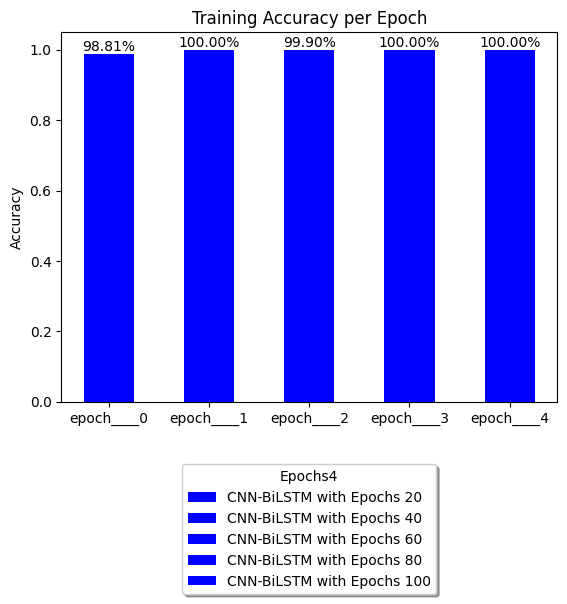

In [213]:
fig, ax4 = plt.subplots()

acc____0 = history____0.history['accuracy'][-1]
acc____1 = history____1.history['accuracy'][-1]
acc____2 = history____2.history['accuracy'][-1]
acc____3 = history____3.history['accuracy'][-1]
acc____4 = history____4.history['accuracy'][-1]
accu_____all=[acc____0, acc____1, acc____2, acc____3, acc____4]
epoch____0 = len(history____0.history['accuracy']) 
epoch____1 = len(history____1.history['accuracy'])
epoch____2 = len(history____2.history['accuracy'])
epoch____3 = len(history____3.history['accuracy'])
epoch____4 = len(history____4.history['accuracy'])
epochs4 = ['epoch____0', 'epoch____1', 'epoch____2', 'epoch____3','epoch____4']
bar_labels = ['CNN-BiLSTM with Epochs 20', 'CNN-BiLSTM with Epochs 40', 'CNN-BiLSTM with Epochs 60', 'CNN-BiLSTM with Epochs 80', 'CNN-BiLSTM with Epochs 100']
bar_colors = ['blue', 'blue', 'blue', 'blue','blue']
ax4.bar(epochs4, accu_____all, label=bar_labels, color=bar_colors,width=0.5)
ax4.set_ylabel('Accuracy')
ax4.set_title('Training Accuracy per Epoch')
ax4.legend(title='Epochs4', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=1)
for i, ac in enumerate(accu_____all):
    plt.text(epochs4[i], ac, f'{ac:.2%}', ha='center', va='bottom')
plt.show()

# train_acc = (history.history['accuracy'], history1.history['accuracy'], history2.history['accuracy'], history3.history['accuracy'])
# plt.plot(epochs, acc_all, 'b')
# plt.title('Training Accuracy per Epoch')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')

# plt.show()

In [214]:
img4 = cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0014.jpg')
img4 = cv2.resize(img4,(150,150))
img_array4 = np.array(img4)
img_array4.shape

(150, 150, 3)

In [215]:
img_array4 = img_array4.reshape(1, 150, 150, 3)
img_array4.shape

(1, 150, 150, 3)

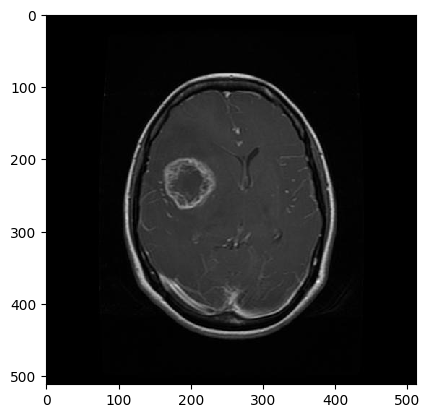

In [216]:
from tensorflow.keras.preprocessing import image
img4 = image.load_img('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0014.jpg')
plt.imshow(img4, interpolation='nearest')
plt.show()

In [217]:
a4=model4.predict(img_array4)
indices4 = a4.argmax()
indices4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


0

In [218]:
from sklearn.metrics import confusion_matrix
pred4 = model4.predict(X_test4)
pred4 = np.argmax(pred4,axis=1)
y_true4 = np.argmax(Y_test4,axis=1)

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [219]:
cm4 = confusion_matrix(y_true4,pred4)
print(cm4)

[[359  35   0   8]
 [119 182  30  39]
 [  9  20 426  11]
 [ 13   5   1 429]]


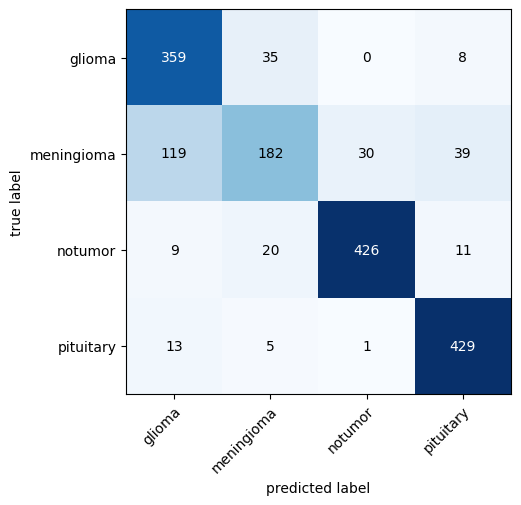

In [220]:
from mlxtend.plotting import plot_confusion_matrix
ax4 = plot_confusion_matrix(conf_mat=cm4,figsize=(5,5),class_names=labels4)
plt.show()

In [221]:
from sklearn.metrics import classification_report
cr4 = classification_report(y_true4,pred4,target_names=labels4)
print(cr4)

              precision    recall  f1-score   support

      glioma       0.72      0.89      0.80       402
  meningioma       0.75      0.49      0.59       370
     notumor       0.93      0.91      0.92       466
   pituitary       0.88      0.96      0.92       448

    accuracy                           0.83      1686
   macro avg       0.82      0.81      0.81      1686
weighted avg       0.83      0.83      0.82      1686



In [222]:
model4.save('braintumor.h5')

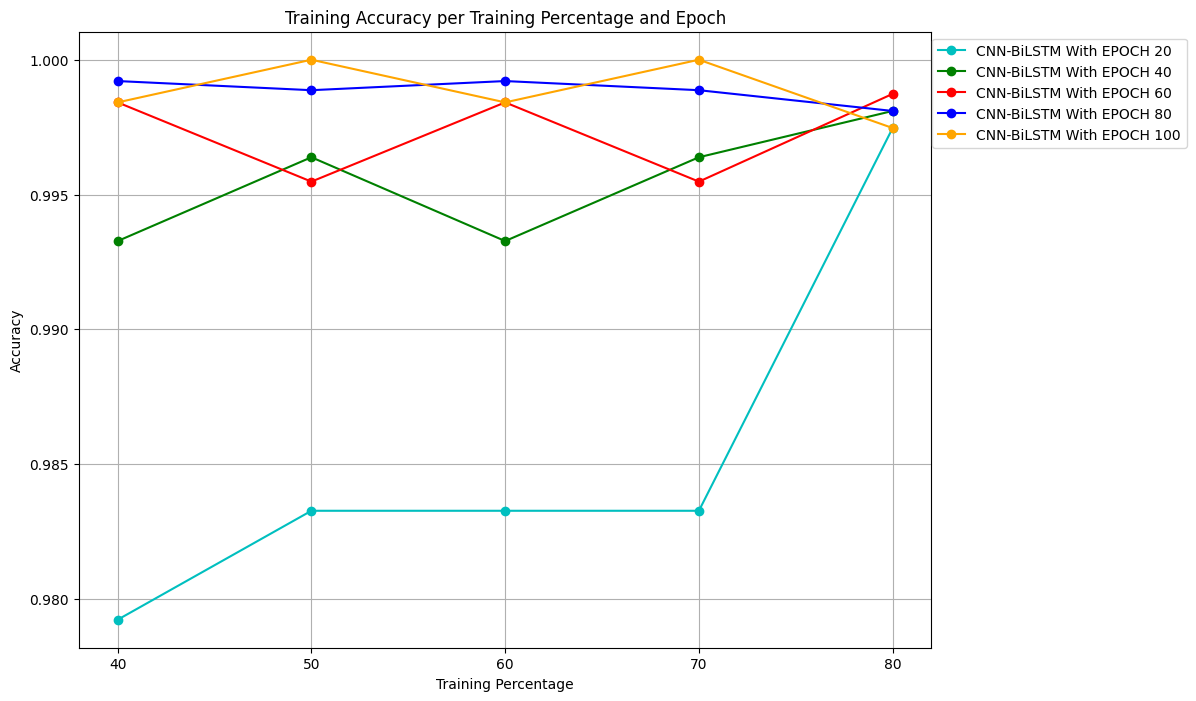

In [223]:
TP = [40, 50, 60, 70, 80]
acc = history.history['accuracy'][-1]
acc1 = history1.history['accuracy'][-1]
acc2 = history2.history['accuracy'][-1]
acc3 = history3.history['accuracy'][-1]
acc4 = history4.history['accuracy'][-1]
acc_0 = history_0.history['accuracy'][-1]
acc_1 = history_1.history['accuracy'][-1]
acc_2 = history_2.history['accuracy'][-1]
acc_3 = history_3.history['accuracy'][-1]
acc_4 = history_4.history['accuracy'][-1]
acc__0 = history__0.history['accuracy'][-1]
acc__1 = history__1.history['accuracy'][-1]
acc__2 = history__2.history['accuracy'][-1]
acc__3 = history__3.history['accuracy'][-1]
acc__4 = history__4.history['accuracy'][-1]
acc___0 = history___0.history['accuracy'][-1]
acc___1 = history___1.history['accuracy'][-1]
acc___2 = history___2.history['accuracy'][-1]
acc___3 = history___3.history['accuracy'][-1]
acc___4 = history___4.history['accuracy'][-1]
acc____0 = history____0.history['accuracy'][-1]
acc____1 = history____1.history['accuracy'][-1]
acc____2 = history____2.history['accuracy'][-1]
acc____3 = history____3.history['accuracy'][-1]
acc____4 = history____4.history['accuracy'][-1]

accu_all=[acc, acc_0, acc_0, acc_0, acc___0]
accu__all=[acc1, acc_1, acc1, acc_1, acc___1]
accu___all=[acc2, acc_2, acc2, acc_2, acc___2]
accu____all=[acc3, acc_3, acc3, acc_3, acc___3]
accu_____all=[acc4, acc_4, acc4, acc_4, acc___4]
accuracy = [accu_all,accu__all,accu___all,accu____all,accu_____all]


fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.plot(TP, accuracy[0], label='CNN-BiLSTM With EPOCH 20', color='c', marker='o')
ax1.plot(TP, accuracy[1], label='CNN-BiLSTM With EPOCH 40', color='g', marker='o')
ax1.plot(TP, accuracy[2], label='CNN-BiLSTM With EPOCH 60', color='r', marker='o')
ax1.plot(TP, accuracy[3], label='CNN-BiLSTM With EPOCH 80', color='b', marker='o')
ax1.plot(TP, accuracy[4], label='CNN-BiLSTM With EPOCH 100', color='orange', marker='o')


plt.xticks(TP)
plt.xlabel('Training Percentage')
plt.ylabel('Accuracy')
ax1.set_title('Training Accuracy per Training Percentage and Epoch')
handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.15,1))
ax1.grid('on')

plt.savefig('cnn-bilstm')